In [1]:
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DATA_DIR = './ml-20m'
MOVIE_CSV_FILE = os.path.join(DATA_DIR, 'movies.csv')
RATINGS_CSV_FILE = os.path.join(DATA_DIR, 'ratings.csv')
TAGS_CSV_FILE = os.path.join(DATA_DIR, 'tags.csv')
LINKS_CSV_FILE = os.path.join(DATA_DIR, 'links.csv')

In [2]:
# Load movies data.
movies = pd.read_csv(MOVIE_CSV_FILE, sep=',')

# Clear the field genres
movies['genres'] = np.where(movies['genres'] == '(no genres listed)', '', movies['genres'])
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Get genres list
def get_genres(s):
    if len(s) == 0:
        return np.NaN
    return s.split('|')

genres_list = movies['genres'].apply(get_genres).dropna()
genres = list(set().union(*list(genres_list)))
print(genres)

['Musical', 'Adventure', 'Action', 'Film-Noir', 'Animation', 'Crime', 'Comedy', 'Western', 'Drama', 'IMAX', 'Thriller', 'Romance', 'Mystery', 'Sci-Fi', 'Children', 'Horror', 'War', 'Fantasy', 'Documentary']


In [4]:
import re
def get_year(s):
    pattern = re.compile('^(.*) \\(([0-9\-]*)\\)$')
    result = pattern.match(s)
    if result:
        return int(result.group(2).split('-')[0])
    else:
        return np.NaN

movies['year'] = movies['title'].apply(get_year)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [5]:
tags = pd.read_csv(TAGS_CSV_FILE, sep=',')
tags['datetime'] = tags['timestamp'].apply(pd.to_datetime, unit='s')
tags.head()

,userId,movieId,tag,timestamp,datetime
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [6]:
links = pd.read_csv(LINKS_CSV_FILE, sep=',')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
ratings = pd.read_csv(RATINGS_CSV_FILE, sep=',')
ratings['datetime'] = ratings['timestamp'].apply(pd.to_datetime, unit='s')
ratings.head()

,userId,movieId,rating,timestamp,datetime
0,1,2,3.5,1112486027,2005-04-02 23:53:47
1,1,29,3.5,1112484676,2005-04-02 23:31:16
2,1,32,3.5,1112484819,2005-04-02 23:33:39
3,1,47,3.5,1112484727,2005-04-02 23:32:07
4,1,50,3.5,1112484580,2005-04-02 23:29:40


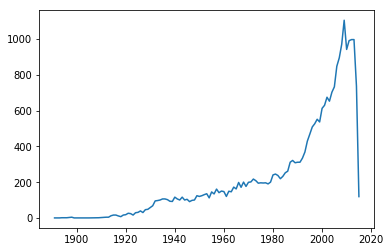

In [9]:
# Numbers of movies by year.
df = movies.groupby(by='year')['title'].count().reset_index(name='count')
df.head()

plt.plot(df['year'], df['count'])
plt.show()

In [10]:
axes = plt.figure().gca()
plt.plot(movies_by_year['year'], movies_by_year['count'])
axes.set_yscale('log')
plt.show()

NameError: name 'movies_by_year' is not defined

In [11]:
# Movies by genres per year.
df = pd.DataFrame()
for g in genres:
    df.loc[g, 'count'] = movies[movies['genres'].str.contains(g)]['movieId'].count()
df = df.sort_values(by='count', ascending=False)
top_genres = list(df.head(5).index)
df

,count
Drama,13344.0
Comedy,8374.0
Thriller,4178.0
Romance,4127.0
Action,3520.0
Crime,2939.0
Horror,2611.0
Documentary,2471.0
Adventure,2329.0
Sci-Fi,1743.0


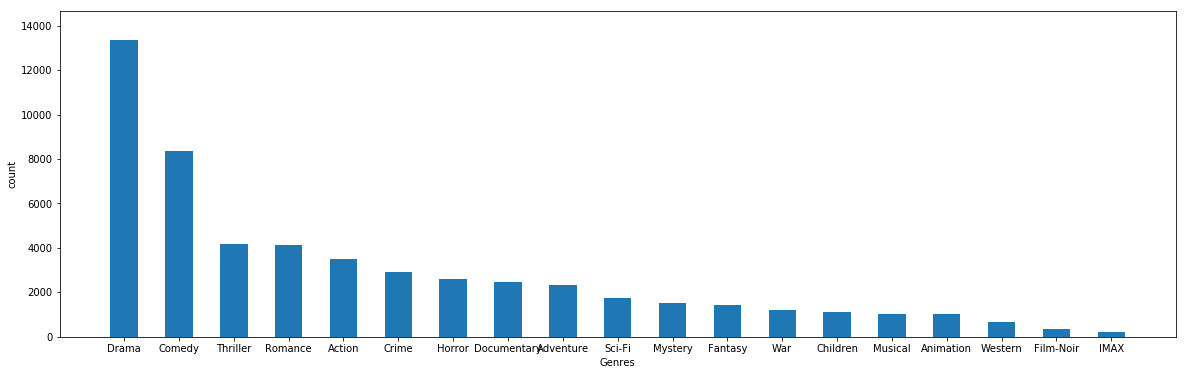

In [13]:
fig = plt.figure(figsize=(20, 6))
axes = fig.gca()
width = 0.50
x = np.arange(0, df['count'].count(), 1)
plt.bar(x, df['count'], width)
plt.xticks(x, df.index)
axes.set_xlabel('Genres')
axes.set_ylabel('count')
axes.set_ylim(1, df['count'].max()*1.1)
plt.show()

In [14]:
df = movies.groupby('year')['movieId'].count().reset_index(name='total_number')
for g in genres:
    df_g = movies[movies['genres'].str.contains(g)].groupby('year')['movieId'].count().reset_index(name=g)
    df = df.join(df_g.set_index('year'), on='year')
df.tail()

,year,total_number,Musical,Adventure,Action,Film-Noir,Animation,Crime,Comedy,Western,...,IMAX,Thriller,Romance,Mystery,Sci-Fi,Children,Horror,War,Fantasy,Documentary
113,2011.0,991,17.0,77.0,130.0,5.0,49.0,71.0,286.0,6.0,...,24.0,170.0,106.0,47.0,70.0,46.0,80.0,25.0,52.0,174.0
114,2012.0,997,24.0,66.0,126.0,1.0,50.0,91.0,301.0,5.0,...,31.0,163.0,112.0,39.0,60.0,31.0,107.0,21.0,40.0,179.0
115,2013.0,997,18.0,77.0,122.0,1.0,49.0,80.0,259.0,5.0,...,32.0,172.0,112.0,44.0,63.0,33.0,87.0,16.0,47.0,187.0
116,2014.0,737,14.0,60.0,110.0,NaN,33.0,80.0,220.0,7.0,...,15.0,122.0,79.0,32.0,55.0,33.0,65.0,17.0,35.0,102.0
117,2015.0,120,NaN,16.0,21.0,NaN,6.0,10.0,37.0,NaN,...,NaN,23.0,8.0,6.0,12.0,8.0,8.0,1.0,5.0,15.0


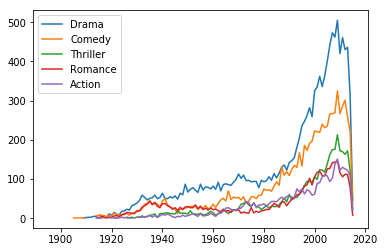

In [15]:
lines = plt.plot(df['year'], df[top_genres])
plt.legend(lines, top_genres)
plt.show()

In [16]:
df = movies.join(ratings.set_index('movieId'), on='movieId', rsuffix='_rating')
df = df[['movieId', 'title', 'rating', 'year']]
grouped = df.groupby(by=['movieId', 'title', 'year'])
movies_ratings = grouped['rating'].agg(['mean', 'min', 'max', 'count']).reset_index()
movies_ratings.head()

,movieId,title,year,mean,min,max,count
0,1,Toy Story (1995),1995.0,3.921240,0.5,5.0,49695
1,2,Jumanji (1995),1995.0,3.211977,0.5,5.0,22243
2,3,Grumpier Old Men (1995),1995.0,3.151040,0.5,5.0,12735
3,4,Waiting to Exhale (1995),1995.0,2.861393,0.5,5.0,2756
4,5,Father of the Bride Part II (1995),1995.0,3.064592,0.5,5.0,12161


In [20]:
movies_ratings = movies_ratings.rename(columns={'mean': 'avg_rating', 'count': 'votes'})
movies_ratings = movies_ratings.sort_values(by='avg_rating', ascending=False)
movies_ratings.sort_values('avg_rating', ascending=False)[['title', 'avg_rating', 'votes']].head(10)

,title,avg_rating,votes
25368,No Distance Left to Run (2010),5.0,1
9003,Life On A String (Bian chang Bian Zou) (1991),5.0,1
26713,A Blank on the Map (1971),5.0,1
24308,The Secret Country: The First Australians Figh...,5.0,1
20042,"Parasites, Les (1999)",5.0,1
20097,Sun Kissed (2012),5.0,1
24347,Taxi Blues (1990),5.0,1
24370,Muddy River (1981),5.0,1
26556,Rigoletto (1993),5.0,1
24548,The Green (2011),5.0,1


In [21]:
movies_ratings.sort_values(['votes', 'avg_rating'], ascending=[False, False])[['title', 'avg_rating', 'votes']].head(10)

,title,avg_rating,votes
293,Pulp Fiction (1994),4.174231,67310
352,Forrest Gump (1994),4.029000,66172
315,"Shawshank Redemption, The (1994)",4.446990,63366
587,"Silence of the Lambs, The (1991)",4.177057,63299
476,Jurassic Park (1993),3.664741,59715
257,Star Wars: Episode IV - A New Hope (1977),4.190672,54502
108,Braveheart (1995),4.042534,53769
583,Terminator 2: Judgment Day (1991),3.931954,52244
2486,"Matrix, The (1999)",4.187186,51334
523,Schindler's List (1993),4.310175,50054


In [22]:
# Use weighted rating which considering the number of the votes.
# Ref: https://districtdatalabs.silvrback.com/computing-a-bayesian-estimate-of-star-rating-means 
def weighted_rating(confidence, prior, votes, rating):
    """It returns the weighted rating.
    
    Args:
        confidence: Numbers of observations needed.
        prior: Rating expected determined a prior.
        votes: Number of the votes.
        rating: The avarage rating of the movie.
        
    Returns:
        Weighted rating.
    """
    return (confidence * prior + votes * rating) / (confidence + votes)

# We determine the confidence as 500 according to the reference.
# Ref: https://redroy44.github.io/2017/02/03/movielens/
confidence = 500
avg_rating = np.mean(movies_ratings['avg_rating'])
movies_ratings['weighted_rating'] = movies_ratings.apply(lambda x: weighted_rating(confidence, avg_rating, x['votes'], x['avg_rating']), axis=1)
movies_ratings = movies_ratings.sort_values(by='weighted_rating', ascending=False)
movies_ratings[['title', 'weighted_rating', 'avg_rating', 'votes']].head(10)

,title,weighted_rating,avg_rating,votes
315,"Shawshank Redemption, The (1994)",4.436709,4.446990,63366
843,"Godfather, The (1972)",4.350027,4.364732,41355
49,"Usual Suspects, The (1995)",4.321736,4.334372,47006
523,Schindler's List (1993),4.298540,4.310175,50054
1195,"Godfather: Part II, The (1974)",4.255176,4.275641,27398
887,Rear Window (1954),4.239645,4.271334,17449
895,Casablanca (1942),4.235699,4.258327,24349
1169,One Flew Over the Cuckoo's Nest (1975),4.229771,4.248079,29932
1935,Seven Samurai (Shichinin no samurai) (1954),4.227098,4.274180,11611
737,Dr. Strangelove or: How I Learned to Stop Worr...,4.223815,4.247287,23220


In [23]:
movies = movies.join(movies_ratings[['movieId', 'avg_rating', 'weighted_rating']].set_index('movieId'), on='movieId')
movies.head()

,movieId,title,genres,year,avg_rating,weighted_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.921240,3.913396
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.211977,3.210258
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.151040,3.150388
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.861393,2.903221
4,5,Father of the Bride Part II (1995),Comedy,1995.0,3.064592,3.067324


In [24]:
# Build the mapping of IDs between MovieLens, IMDB and tmdb.
# Note that we fix the movie id for IMDB.
movies = movies.join(links.set_index('movieId'), on='movieId')
movies['imdbId'] = movies['imdbId'].apply(lambda x: 'tt0{}'.format(x))
movies.head()

,movieId,title,genres,year,avg_rating,weighted_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.921240,3.913396,tt0114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.211977,3.210258,tt0113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.151040,3.150388,tt0113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.861393,2.903221,tt0114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,3.064592,3.067324,tt0113041,11862.0


In [25]:
# Get more information (i.e., directors, budget, revenue) from other movie database.
# IMDB data can be fetched through python client (wrapping REST API), but it costs time.
# TMDB data files are fetched according to the reference.
# Ref: https://www.kaggle.com/tmdb/tmdb-movie-metadata/data 
tmdb_movies = pd.read_csv('./tmdb_5000/tmdb_5000_movies.csv')
tmdb_credits = pd.read_csv('./tmdb_5000/tmdb_5000_credits.csv')

import json

def get_job(crew, job):
    crew = json.loads(crew)
    for item in crew:
        if item['job'] == job:
            return item['name']

tmdb = tmdb_credits[['movie_id']]
tmdb['director'] = tmdb_credits['crew'].apply(get_job, job='Director')

df = tmdb_movies[['id', 'budget', 'revenue']]
tmdb = tmdb.join(df.set_index('id'), on='movie_id')

tmdb.head()

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,movie_id,director,budget,revenue
0,19995,James Cameron,237000000,2787965087
1,285,Gore Verbinski,300000000,961000000
2,206647,Sam Mendes,245000000,880674609
3,49026,Christopher Nolan,250000000,1084939099
4,49529,Andrew Stanton,260000000,284139100


In [26]:
movies = movies.join(tmdb.set_index('movie_id'), on='tmdbId')
movies.head()

,movieId,title,genres,year,avg_rating,weighted_rating,imdbId,tmdbId,director,budget,revenue
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.921240,3.913396,tt0114709,862,John Lasseter,30000000.0,373554033.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.211977,3.210258,tt0113497,8844,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.151040,3.150388,tt0113228,15602,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.861393,2.903221,tt0114885,31357,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,1995.0,3.064592,3.067324,tt0113041,11862,NaN,NaN,NaN


In [27]:
# Find the directors of the most revenue.
df = movies[['director', 'revenue']]
df = df.groupby('director')['revenue'].sum().reset_index(name='total_revenue').sort_values('total_revenue', ascending=False)
directors = list(df.head(20)['director'])

In [28]:
# Find the ratings of all these 'big' directors.
# Note that Christopher Nolan and Michael Bay are extremes for these directors.
df = movies[['director', 'weighted_rating']]
df = df[df['director'].isin(directors)]
df.groupby('director')['weighted_rating'].mean().reset_index(name='rating').sort_values('rating', ascending=False)

,director,rating
4,Christopher Nolan,3.953357
9,James Cameron,3.715764
12,Peter Jackson,3.686752
18,Steven Spielberg,3.554989
1,Bryan Singer,3.544093
7,George Lucas,3.517404
13,Ridley Scott,3.459349
0,Andrew Adamson,3.458768
5,Clint Eastwood,3.440070
6,Francis Lawrence,3.411752


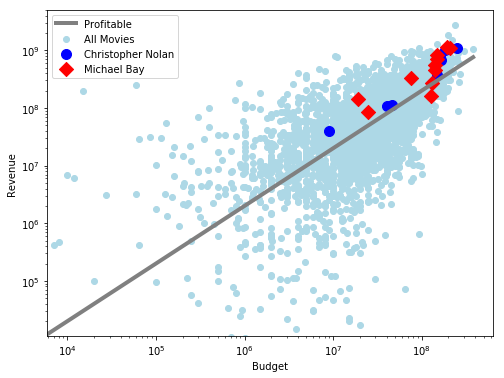

In [29]:
fig = plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['budget'], movies['revenue'], label='All Movies', color='lightblue')

# It is often said that the movie is profitable if its revenue doubles the budget.
x = np.arange(0, movies['budget'].max(), 10000)
y = 2 * x
axes.plot(x, y, color='grey', label='Profitable', linewidth=4)

# Analyse the directors
df = movies[movies['director'] == 'Christopher Nolan']
axes.scatter(df['budget'], df['revenue'], color='blue', s=100, label='Christopher Nolan')

df = movies[movies['director'] == 'Michael Bay']
axes.scatter(df['budget'], df['revenue'], color='red', marker='D', s=100, label='Michael Bay')

axes.set_xlabel('Budget')
axes.set_ylabel('Revenue')
axes.set_xscale('log')
axes.set_yscale('log')
plt.legend()
plt.show()

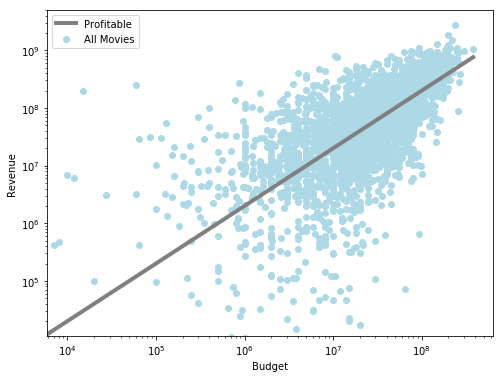

In [30]:
fig = plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['budget'], movies['revenue'], label='All Movies', color='lightblue')

# It is often said that the movie is profitable if its revenue doubles the budget.
x = np.arange(0, movies['budget'].max(), 10000)
y = 2 * x
axes.plot(x, y, color='grey', label='Profitable', linewidth=4)

axes.set_xlabel('Budget')
axes.set_ylabel('Revenue')
axes.set_xscale('log')
axes.set_yscale('log')
plt.legend()
plt.show()

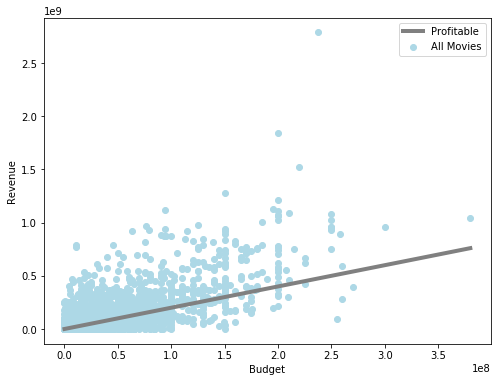

In [31]:
fig = plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['budget'], movies['revenue'], label='All Movies', color='lightblue')

# It is often said that the movie is profitable if its revenue doubles the budget.
x = np.arange(0, movies['budget'].max(), 10000)
y = 2 * x
axes.plot(x, y, color='grey', label='Profitable', linewidth=4)

axes.set_xlabel('Budget')
axes.set_ylabel('Revenue')
plt.legend()
plt.show()

In [32]:
print('All the movies:\n', movies[['budget', 'revenue']].corr())

df = movies[movies['director'] == 'Christopher Nolan']
print('Nolan:\n', df[['budget', 'revenue']].corr())

df = movies[movies['director'] == 'Michael Bay']
print('Micahel Bay:\n', df[['budget', 'revenue']].corr())

All the movies:
            budget   revenue
budget   1.000000  0.716023
revenue  0.716023  1.000000
Nolan:
            budget   revenue
budget   1.000000  0.943888
revenue  0.943888  1.000000
Micahel Bay:
            budget   revenue
budget   1.000000  0.850544
revenue  0.850544  1.000000


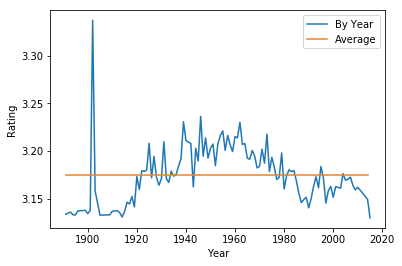

In [33]:
fig = plt.figure()
axes = fig.gca() 

df = movies[['year', 'weighted_rating']].groupby(by='year')['weighted_rating'].mean().reset_index(name='rating')
plt.plot(df['year'], df['rating'], label='By Year')
x = np.arange(df['year'].min(), df['year'].max(), 1)
y = np.empty(len(x))
y.fill(df['rating'].mean())
plt.plot(x, y, label='Average')
axes.set_xlabel('Year')
axes.set_ylabel('Rating')
plt.legend()
plt.show()

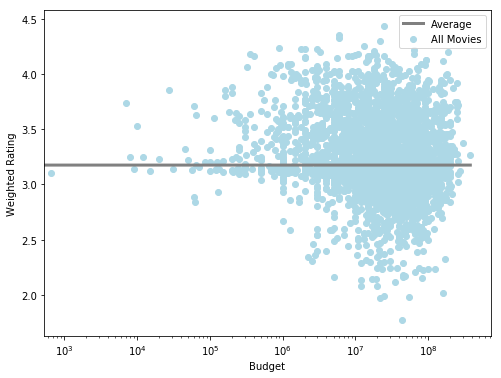

In [34]:
plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['budget'], movies['weighted_rating'], label='All Movies', color='lightblue')

# Draw a horizon line for average rating.
# It's ok to use a constant for all the years since it varies a little year-by-year.
x = np.arange(movies['budget'].min(), movies['budget'].max(), 1000)
y = np.empty(len(x))
y.fill(df['rating'].mean())
axes.plot(x, y, label='Average', color='grey', linewidth=3)

axes.set_xlabel('Budget')
axes.set_ylabel('Weighted Rating')
axes.set_xscale('log')
plt.legend()
plt.show()

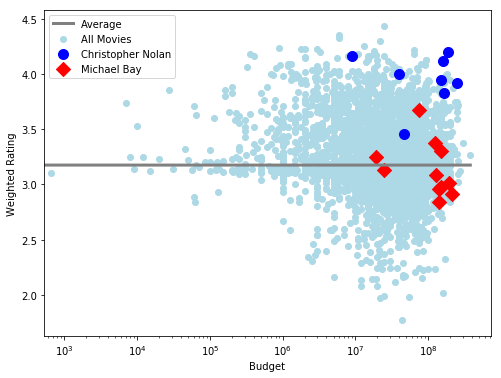

In [35]:
plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['budget'], movies['weighted_rating'], label='All Movies', color='lightblue')

# Draw a horizon line for average rating.
# It's ok to use a constant for all the years since it varies a little year-by-year.
x = np.arange(movies['budget'].min(), movies['budget'].max(), 1000)
y = np.empty(len(x))
y.fill(df['rating'].mean())
axes.plot(x, y, label='Average', color='grey', linewidth=3)

df = movies[movies['director'] == 'Christopher Nolan']
axes.scatter(df['budget'], df['weighted_rating'], label='Christopher Nolan', color='blue', s=100)

df = movies[movies['director'] == 'Michael Bay']
axes.scatter(df['budget'], df['weighted_rating'], label='Michael Bay', marker='D', color='red', s=100)

axes.set_xlabel('Budget')
axes.set_ylabel('Weighted Rating')
axes.set_xscale('log')
plt.legend()
plt.show()

In [36]:
movies[movies['director'] == 'Michael Bay'].sort_values('weighted_rating', ascending=False)

,movieId,title,genres,year,avg_rating,weighted_rating,imdbId,tmdbId,director,budget,revenue
721,733,"Rock, The (1996)",Action|Adventure|Thriller,1996.0,3.679536,3.670969,tt0117500,9802,Michael Bay,75000000.0,3.350626e+08
10267,34319,"Island, The (2005)",Action|Sci-Fi|Thriller,2005.0,3.404050,3.375582,tt0399201,1635,Michael Bay,126000000.0,1.629492e+08
11972,53996,Transformers (2007),Action|Sci-Fi|Thriller|IMAX,2007.0,3.322122,3.306844,tt0418279,1858,Michael Bay,150000000.0,7.097098e+08
143,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,1995.0,3.250772,3.246083,tt0112442,9737,Michael Bay,19000000.0,1.414070e+08
20876,102033,Pain & Gain (2013),Action|Comedy|Crime,2013.0,3.110360,3.126576,tt01980209,134374,Michael Bay,25000000.0,8.617529e+07
6438,6548,Bad Boys II (2003),Action|Comedy|Crime|Thriller,2003.0,3.074023,3.082833,tt0172156,8961,Michael Bay,130000000.0,2.733396e+08
17358,87520,Transformers: Dark of the Moon (2011),Action|Adventure|Sci-Fi|War|IMAX,2011.0,2.944979,3.010716,tt01399103,38356,Michael Bay,195000000.0,1.123747e+09
13876,69526,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX,2009.0,2.938121,2.977065,tt01055369,8373,Michael Bay,150000000.0,8.362972e+08
1833,1917,Armageddon (1998),Action|Romance|Sci-Fi|Thriller,1998.0,2.957471,2.961551,tt0120591,95,Michael Bay,140000000.0,5.537996e+08
23610,112370,Transformers: Age of Extinction (2014),Action|Adventure|Sci-Fi,2014.0,2.521352,2.913428,tt02109248,91314,Michael Bay,210000000.0,1.091405e+09


In [37]:
print('All the movies:\n', movies[['budget', 'weighted_rating']].corr())

df = movies[movies['director'] == 'Christopher Nolan']
print('Nolan:\n', df[['budget', 'weighted_rating']].corr())

df = movies[movies['director'] == 'Michael Bay']
print('Micahel Bay:\n', df[['budget', 'weighted_rating']].corr())

All the movies:
                    budget  weighted_rating
budget           1.000000        -0.015093
weighted_rating -0.015093         1.000000
Nolan:
                    budget  weighted_rating
budget           1.000000         0.153898
weighted_rating  0.153898         1.000000
Micahel Bay:
                    budget  weighted_rating
budget           1.000000        -0.480404
weighted_rating -0.480404         1.000000


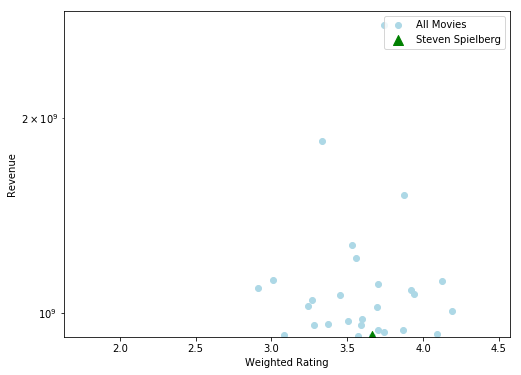

In [38]:
plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['weighted_rating'], movies['revenue'], label='All Movies', color='lightblue')

# df = movies[movies['director'] == 'Christopher Nolan']
# axes.scatter(df['weighted_rating'], df['revenue'], label='Christopher Nolan', color='blue', s=100)

# df = movies[movies['director'] == 'Michael Bay']
# axes.scatter(df['weighted_rating'], df['revenue'], label='Michael Bay', marker='D', color='red', s=100)

df = movies[movies['director'] == 'Steven Spielberg']
axes.scatter(df['weighted_rating'], df['revenue'], label='Steven Spielberg', marker='^', color='green', s=100)

axes.set_xlabel('Weighted Rating')
axes.set_ylabel('Revenue')
axes.set_yscale('log')
plt.legend()
plt.show()

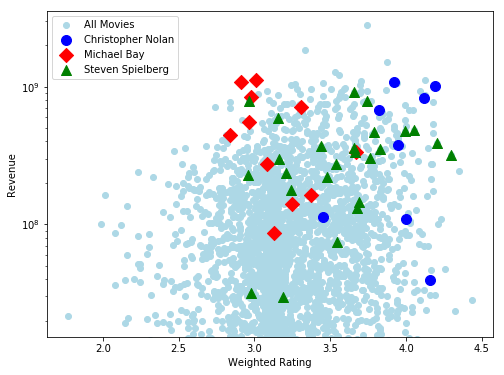

In [39]:
plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['weighted_rating'], movies['revenue'], label='All Movies', color='lightblue')

df = movies[movies['director'] == 'Christopher Nolan']
axes.scatter(df['weighted_rating'], df['revenue'], label='Christopher Nolan', color='blue', s=100)

df = movies[movies['director'] == 'Michael Bay']
axes.scatter(df['weighted_rating'], df['revenue'], label='Michael Bay', marker='D', color='red', s=100)

df = movies[movies['director'] == 'Steven Spielberg']
axes.scatter(df['weighted_rating'], df['revenue'], label='Steven Spielberg', marker='^', color='green', s=100)

axes.set_xlabel('Weighted Rating')
axes.set_ylabel('Revenue')
axes.set_yscale('log')
plt.legend()
plt.show()

In [40]:
print('All the movies:\n', movies[['weighted_rating', 'revenue']].corr())

df = movies[movies['director'] == 'Christopher Nolan']
print('Nolan:\n', df[['weighted_rating', 'revenue']].corr())

df = movies[movies['director'] == 'Michael Bay']
print('Micahel Bay:\n', df[['weighted_rating', 'revenue']].corr())

df = movies[movies['director'] == 'Steven Spielberg']
print('Steven Spielberg:\n', df[['weighted_rating', 'revenue']].corr())

All the movies:
                  weighted_rating   revenue
weighted_rating         1.000000  0.182589
revenue                 0.182589  1.000000
Nolan:
                  weighted_rating   revenue
weighted_rating         1.000000  0.297794
revenue                 0.297794  1.000000
Micahel Bay:
                  weighted_rating  revenue
weighted_rating          1.00000 -0.45553
revenue                 -0.45553  1.00000
Steven Spielberg:
                  weighted_rating   revenue
weighted_rating         1.000000  0.181502
revenue                 0.181502  1.000000


In [41]:
df = pd.DataFrame()
for g in genres:
    corr = movies[movies['genres'].str.contains(g)][['budget', 'revenue']].corr()
    df.loc[g, 'corr'] = corr.loc['budget', 'revenue']
df = df.sort_values('corr', ascending=False)
df

,corr
Mystery,0.743985
Crime,0.740986
Fantasy,0.740334
Thriller,0.716625
Action,0.714827
Adventure,0.707160
Comedy,0.706973
Sci-Fi,0.706759
Animation,0.674161
Children,0.663459


In [48]:
df = pd.DataFrame()
for g in genres:
    df.loc[g, 'budget'] = movies[['budget']][movies['genres'].str.contains(g)]['budget'].mean()
df = df.sort_values('budget', ascending=False)
df

,budget
IMAX,1.304365e+08
Animation,6.889065e+07
Adventure,6.791391e+07
Fantasy,6.027218e+07
Sci-Fi,5.737926e+07
Children,5.701343e+07
Action,5.656278e+07
War,3.891417e+07
Thriller,3.603720e+07
Crime,2.968525e+07


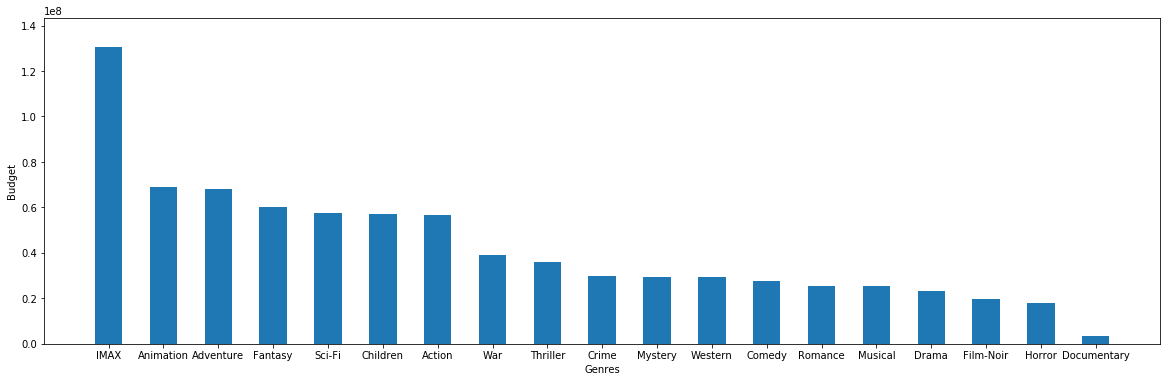

In [43]:
fig = plt.figure(figsize=(20, 6))
axes = fig.gca()
width = 0.50
x = np.arange(0, df['budget'].count(), 1)
plt.bar(x, df['budget'], width)
plt.xticks(x, df.index)
axes.set_xlabel('Genres')
axes.set_ylabel('Budget')
axes.set_ylim(1, df['budget'].max()*1.1)
plt.show()

In [51]:
genres_revenue = list(df.index)
genres_revenue

['IMAX',
 'Animation',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Children',
 'Action',
 'War',
 'Thriller',
 'Crime',
 'Mystery',
 'Western',
 'Comedy',
 'Romance',
 'Musical',
 'Drama',
 'Film-Noir',
 'Horror',
 'Documentary']

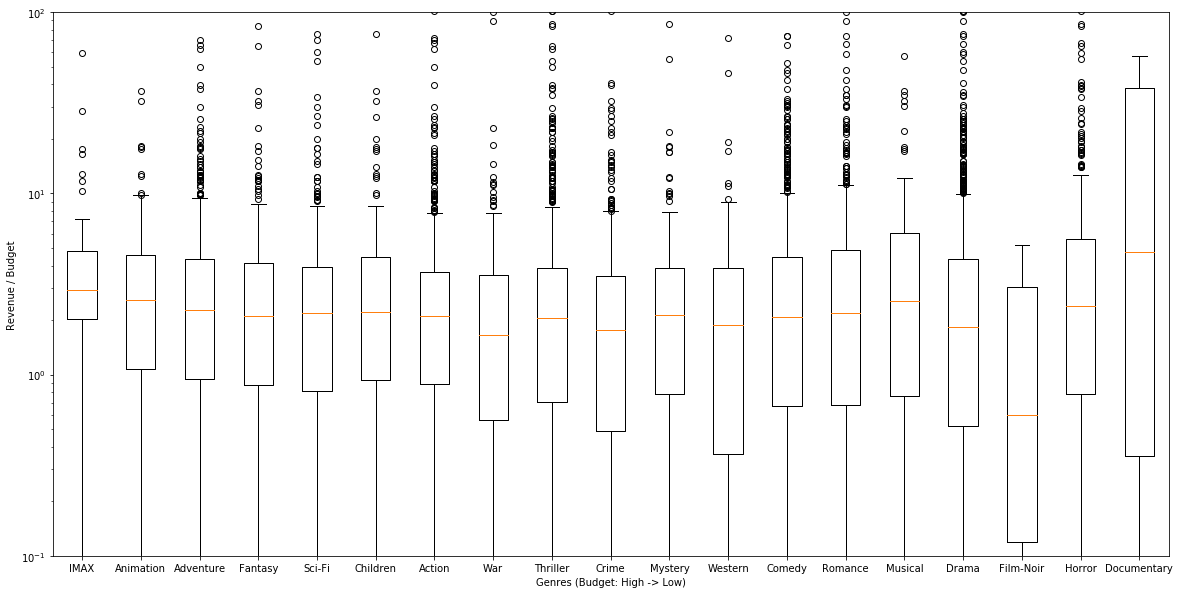

In [54]:
df = pd.DataFrame()
data = []
for g in genres_revenue:
    df_g = movies[movies['genres'].str.contains(g)].dropna()
    data.append((df_g['revenue'] / df_g['budget']).dropna())
fig = plt.figure(figsize=(20, 10))
axes = fig.gca()
box = plt.boxplot(data)
plt.xticks(range(1, len(genres)+1), genres_revenue)
axes.set_ylim(0.1, 100)
axes.set_yscale('log')
axes.set_xlabel('Genres (Budget: High -> Low)')
axes.set_ylabel('Revenue / Budget')
plt.show()

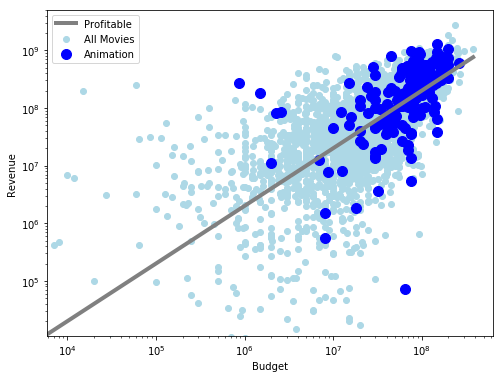

In [55]:
fig = plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['budget'], movies['revenue'], label='All Movies', color='lightblue')
x = np.arange(0, movies['budget'].max(), 10000)
y = 2 * x
axes.plot(x, y, color='grey', label='Profitable', linewidth=4)

df = movies[movies['genres'].str.contains('Animation')]
axes.scatter(df['budget'], df['revenue'], color='blue', s=100, label='Animation')

# df = movies[movies['genres'].str.contains('Film-Noir')]
# axes.scatter(df['budget'], df['revenue'], color='red', marker='^', s=100, label='Film-Noir')

axes.set_xlabel('Budget')
axes.set_ylabel('Revenue')
axes.set_xscale('log')
axes.set_yscale('log')
plt.legend()
plt.show()

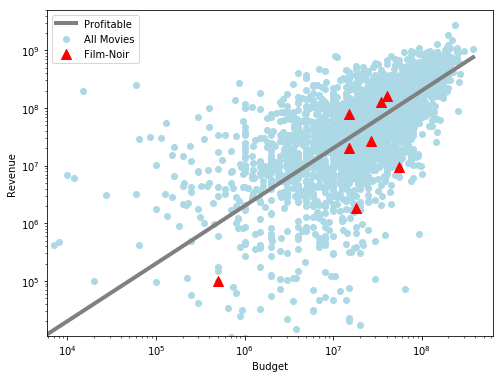

In [56]:
fig = plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['budget'], movies['revenue'], label='All Movies', color='lightblue')
x = np.arange(0, movies['budget'].max(), 10000)
y = 2 * x
axes.plot(x, y, color='grey', label='Profitable', linewidth=4)

# df = movies[movies['genres'].str.contains('Animation')]
# axes.scatter(df['budget'], df['revenue'], color='blue', s=100, label='Animation')

df = movies[movies['genres'].str.contains('Film-Noir')]
axes.scatter(df['budget'], df['revenue'], color='red', marker='^', s=100, label='Film-Noir')

axes.set_xlabel('Budget')
axes.set_ylabel('Revenue')
axes.set_xscale('log')
axes.set_yscale('log')
plt.legend()
plt.show()

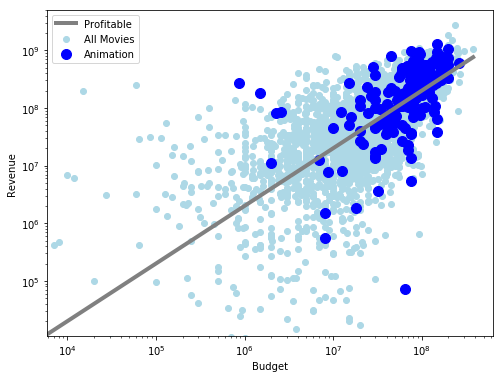

In [58]:
fig = plt.figure(figsize=(8, 6))
axes = plt.gca()

axes.scatter(movies['budget'], movies['revenue'], label='All Movies', color='lightblue')

x = np.arange(0, movies['budget'].max(), 10000)
y = 2 * x
axes.plot(x, y, color='grey', label='Profitable', linewidth=4)

df = movies[movies['genres'].str.contains('Animation')]
axes.scatter(df['budget'], df['revenue'], color='blue', s=100, label='Animation')

axes.set_xlabel('Budget')
axes.set_ylabel('Revenue')
axes.set_xscale('log')
axes.set_yscale('log')
plt.legend()
plt.show()

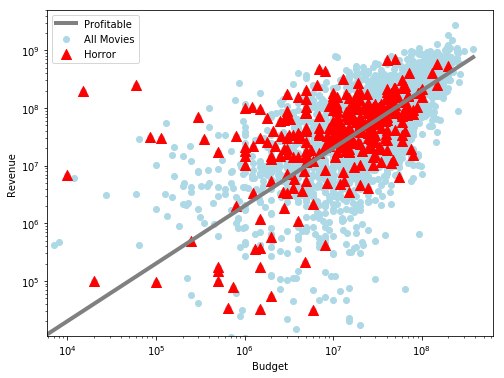

In [57]:
fig = plt.figure(figsize=(8, 6))
axes = plt.gca()

axes.scatter(movies['budget'], movies['revenue'], label='All Movies', color='lightblue')
x = np.arange(0, movies['budget'].max(), 10000)
y = 2 * x
axes.plot(x, y, color='grey', label='Profitable', linewidth=4)

df = movies[movies['genres'].str.contains('Horror')]
axes.scatter(df['budget'], df['revenue'], color='red', marker='^', s=100, label='Horror')

axes.set_xlabel('Budget')
axes.set_ylabel('Revenue')
axes.set_xscale('log')
axes.set_yscale('log')
plt.legend()
plt.show()

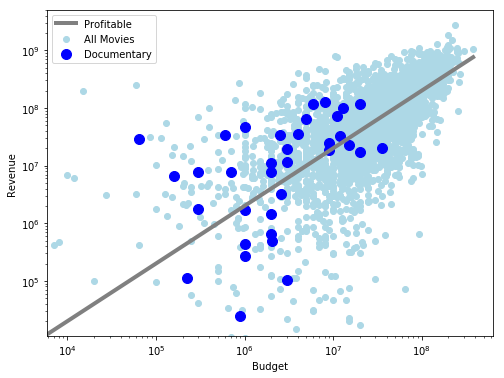

In [59]:
fig = plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['budget'], movies['revenue'], label='All Movies', color='lightblue')
x = np.arange(0, movies['budget'].max(), 10000)
y = 2 * x
axes.plot(x, y, color='grey', label='Profitable', linewidth=4)

df = movies[movies['genres'].str.contains('Documentary')]
axes.scatter(df['budget'], df['revenue'], color='blue', s=100, label='Documentary')

# df = movies[movies['genres'].str.contains('Film-Noir')]
# axes.scatter(df['budget'], df['revenue'], color='red', marker='v', s=100, label='Film-Noir')

axes.set_xlabel('Budget')
axes.set_ylabel('Revenue')
axes.set_xscale('log')
axes.set_yscale('log')
plt.legend()
plt.show()

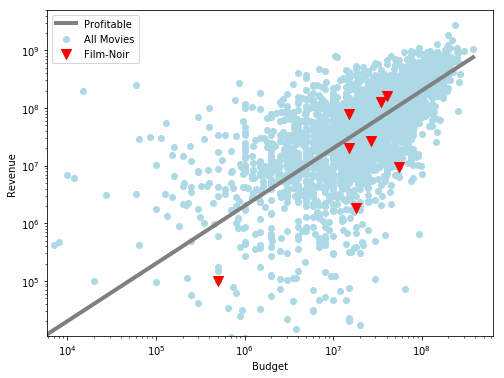

In [60]:
fig = plt.figure(figsize=(8, 6))
axes = plt.gca()
axes.scatter(movies['budget'], movies['revenue'], label='All Movies', color='lightblue')
x = np.arange(0, movies['budget'].max(), 10000)
y = 2 * x
axes.plot(x, y, color='grey', label='Profitable', linewidth=4)

# df = movies[movies['genres'].str.contains('Documentary')]
# axes.scatter(df['budget'], df['revenue'], color='green', marker='D', s=100, label='Documentary')

df = movies[movies['genres'].str.contains('Film-Noir')]
axes.scatter(df['budget'], df['revenue'], color='red', marker='v', s=100, label='Film-Noir')

axes.set_xlabel('Budget')
axes.set_ylabel('Revenue')
axes.set_xscale('log')
axes.set_yscale('log')
plt.legend()
plt.show()

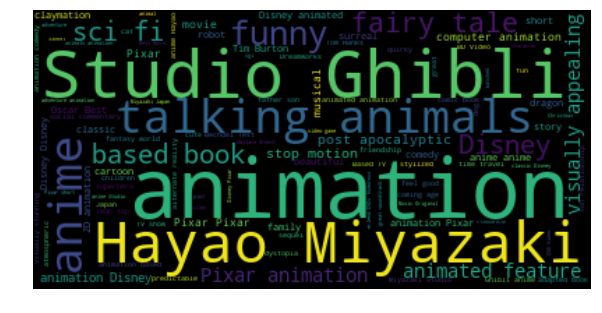

In [108]:
from wordcloud import WordCloud

df = movies[['movieId', 'title', 'genres']].join(tags[['movieId', 'tag']].set_index('movieId'), on='movieId')
words = ' '.join(list(df[df['genres'].str.contains('Animation')]['tag'].dropna()))
wc = WordCloud().generate(words)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

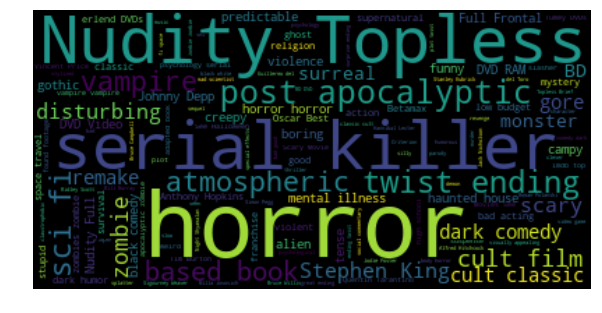

In [106]:
df = movies[['movieId', 'title', 'genres']].join(tags[['movieId', 'tag']].set_index('movieId'), on='movieId')
words = ' '.join(list(df[df['genres'].str.contains('Horror')]['tag'].dropna()))
wc = WordCloud().generate(words)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

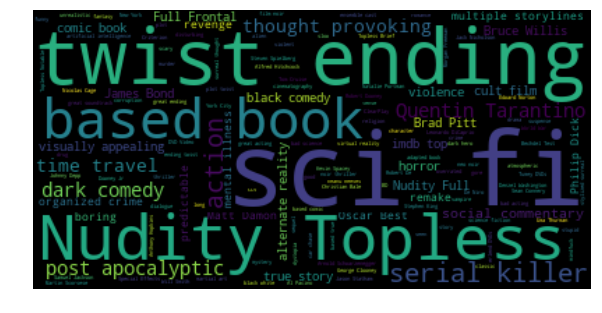

In [104]:
df = movies[['movieId', 'title', 'genres']].join(tags[['movieId', 'tag']].set_index('movieId'), on='movieId')
words = ' '.join(list(df[df['genres'].str.contains('Thriller')]['tag'].dropna()))
wc = WordCloud().generate(words)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

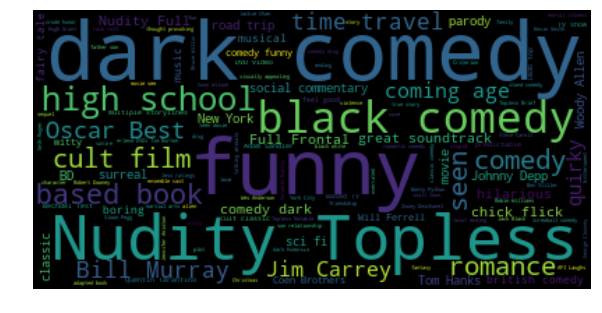

In [226]:
df = movies[['movieId', 'title', 'genres']].join(tags[['movieId', 'tag']].set_index('movieId'), on='movieId')
words = ' '.join(list(df[df['genres'].str.contains('Comedy')]['tag'].dropna()))
wc = WordCloud().generate(words)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [110]:
df = ratings.join(movies[['movieId', 'title']].set_index('movieId'), on='movieId').reset_index()
df.head(10)

,index,userId,movieId,rating,timestamp,datetime,title
0,0,1,2,3.5,1112486027,2005-04-02 23:53:47,Jumanji (1995)
1,1,1,29,3.5,1112484676,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p..."
2,2,1,32,3.5,1112484819,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,3,1,47,3.5,1112484727,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995)
4,4,1,50,3.5,1112484580,2005-04-02 23:29:40,"Usual Suspects, The (1995)"
5,5,1,112,3.5,1094785740,2004-09-10 03:09:00,Rumble in the Bronx (Hont faan kui) (1995)
6,6,1,151,4.0,1094785734,2004-09-10 03:08:54,Rob Roy (1995)
7,7,1,223,4.0,1112485573,2005-04-02 23:46:13,Clerks (1994)
8,8,1,253,4.0,1112484940,2005-04-02 23:35:40,Interview with the Vampire: The Vampire Chroni...
9,9,1,260,4.0,1112484826,2005-04-02 23:33:46,Star Wars: Episode IV - A New Hope (1977)


In [ ]:
import time
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import KNNBasic
from surprise import accuracy
from surprise import dump

print('Begin to read data')
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']].head(100), reader)
# data = data.build_full_dataset()
data.split(n_folds=3)

print('Begin to train data')
# sim_options = {
#     'name': 'pearson',
#     'user_based': True,
#     'min_support': 10,
# }
# algo = KNNBasic(sim_options=sim_options)
algo = SVD()
# algo.train(data)
counter = 0
for train_set, test_set in data.folds():
    print('Training {}th data: {}'.format(counter, time.gmtime()))
    algo.train(train_set)
    print('Evaluating {}th data: {}'.format(counter, time.gmtime()))
    accuracy.rmse(algo.test(test_set), verbose=True)
    counter += 1

dump.dump('./cf.model', algo=algo)    
# pred = alg.predict(2, 1036)
# print('Prediction:', pred)

In [203]:
test_uid = 30 # 657 # 209
df = ratings[ratings['userId'] == test_uid].join(movies[['movieId', 'title', 'year', 'genres']].set_index('movieId'), on='movieId').sort_values(by=['rating', 'year'], ascending=[False, False])
df = df[['title', 'genres', 'rating']]
df.head(10)


,title,genres,rating
3526,"Green Mile, The (1999)",Crime|Drama,5.0
3522,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,5.0
3512,Pinocchio (1940),Animation|Children|Fantasy|Musical,5.0
3533,Million Dollar Baby (2004),Drama,4.5
3513,Sleepers (1996),Thriller,4.5
3521,Seven Beauties (Pasqualino Settebellezze) (1976),Comedy|Drama,4.5
3508,Hot Shots! Part Deux (1993),Action|Comedy|War,3.5
3527,Predator (1987),Action|Sci-Fi|Thriller,3.5
3516,"Terminator, The (1984)",Action|Sci-Fi|Thriller,3.5
3532,AVP: Alien vs. Predator (2004),Action|Horror|Sci-Fi|Thriller,3.0


In [208]:
from surprise import dump
from rec import Predictor
REC_MODEL_FILE = os.path.join(DATA_DIR, 'rec.model')
predictor = Predictor(model_file='./ml-latest-small/rec.model')

# _, algo = dump.load(REC_MODEL_FILE)
df = movies[['movieId', 'title', 'genres']]
df['rating'] = df['movieId'].apply(lambda x: predictor.predict(test_uid, x))
df = df[['title', 'genres', 'rating']]
df.sort_values(['rating'], ascending=[False]).head(10)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,title,genres,rating
5861,Bad Influence (1990),Drama|Thriller,5.000000
3994,"Big Town, The (1987)",Drama|Romance|Thriller,5.000000
4522,Let It Ride (1989),Comedy,5.000000
1181,To Kill a Mockingbird (1962),Drama,4.954612
1199,Amadeus (1984),Drama,4.953816
1876,"Last Emperor, The (1987)",Drama,4.941844
4169,Days of Wine and Roses (1962),Drama,4.939079
14537,"Princess and the Frog, The (2009)",Animation|Children|Fantasy|Musical|Romance,4.924493
4311,"Man Who Shot Liberty Valance, The (1962)",Crime|Drama|Western,4.920654
843,"Godfather, The (1972)",Crime|Drama,4.920109


In [218]:
test_movie = 648
neighbors = predictor.get_movie_neighbors(test_movie)
df = movies[movies['movieId'].isin(neighbors)]
df[['title', 'director', 'genres', 'weighted_rating']]

,title,director,genres,weighted_rating
5,Heat (1995),NaN,Action|Crime|Thriller,3.820562
31,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),NaN,Mystery|Sci-Fi|Thriller,3.889652
313,Stargate (1994),NaN,Action|Adventure|Sci-Fi,3.350812
325,Star Trek: Generations (1994),David Carson,Adventure|Drama|Sci-Fi,3.325988
345,Clear and Present Danger (1994),Phillip Noyce,Action|Crime|Drama|Thriller,3.651554
373,Speed (1994),Jan de Bont,Action|Romance|Thriller,3.488930
453,"Fugitive, The (1993)",Andrew Davis,Thriller,3.977185
583,Terminator 2: Judgment Day (1991),James Cameron,Action|Sci-Fi,3.924387
1263,Indiana Jones and the Last Crusade (1989),Steven Spielberg,Action|Adventure,3.993845
5348,Minority Report (2002),Steven Spielberg,Action|Crime|Mystery|Sci-Fi|Thriller,3.653897


In [216]:
movies[movies['movieId'] == test_movie][['title', 'director', 'genres', 'weighted_rating']]

,title,director,genres,weighted_rating
640,Mission: Impossible (1996),Brian De Palma,Action|Adventure|Mystery|Thriller,3.385212


In [242]:
df1 = tags.groupby('userId')['movieId'].count().reset_index(name='movie_tagged')
print(df1.describe())
df2 = tags.groupby('movieId')['userId'].count().reset_index(name='user_tagged')
print(df2.describe())

              userId  movie_tagged
count    7801.000000   7801.000000
mean    69106.573901     59.680041
std     40012.742757    414.804414
min        18.000000      1.000000
25%     34324.000000      2.000000
50%     69473.000000      4.000000
75%    103701.000000     20.000000
max    138472.000000  20356.000000
             movieId   user_tagged
count   19545.000000  19545.000000
mean    51195.723356     23.820107
std     42936.202082     70.071439
min         1.000000      1.000000
25%      5752.000000      2.000000
50%     49282.000000      5.000000
75%     91927.000000     16.000000
max    131258.000000   1994.000000


In [240]:
ratings.count()
df1 = ratings.groupby('userId')['movieId'].count().reset_index(name='movie_rated')
print(df1.describe())
df2 = ratings.groupby('movieId')['userId'].count().reset_index(name='user_rated')
print(df2.describe())

              userId    movie_rated
count  138493.000000  138493.000000
mean    69247.000000     144.413530
std     39979.629753     230.267257
min         1.000000      20.000000
25%     34624.000000      35.000000
50%     69247.000000      68.000000
75%    103870.000000     155.000000
max    138493.000000    9254.000000
             movieId    user_rated
count   26744.000000  26744.000000
mean    58789.612436    747.841123
std     44159.344871   3085.818268
min         1.000000      1.000000
25%      6795.750000      3.000000
50%     65880.000000     18.000000
75%     99110.500000    205.000000
max    131262.000000  67310.000000
